In [ ]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sm

In [9]:
ad= pd.read_csv("/Users/firatyalin/Desktop/GIT/My-Data-Science-Training/Data/Advertising.csv")
df=ad.copy()

In [10]:
df=df.iloc[:,1:len(df)]

In [11]:
df.head()

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


In [15]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [16]:
df.corr()

,TV,radio,newspaper,sales
TV,1.000000,0.054809,0.056648,0.782224
radio,0.054809,1.000000,0.354104,0.576223
newspaper,0.056648,0.354104,1.000000,0.228299
sales,0.782224,0.576223,0.228299,1.000000


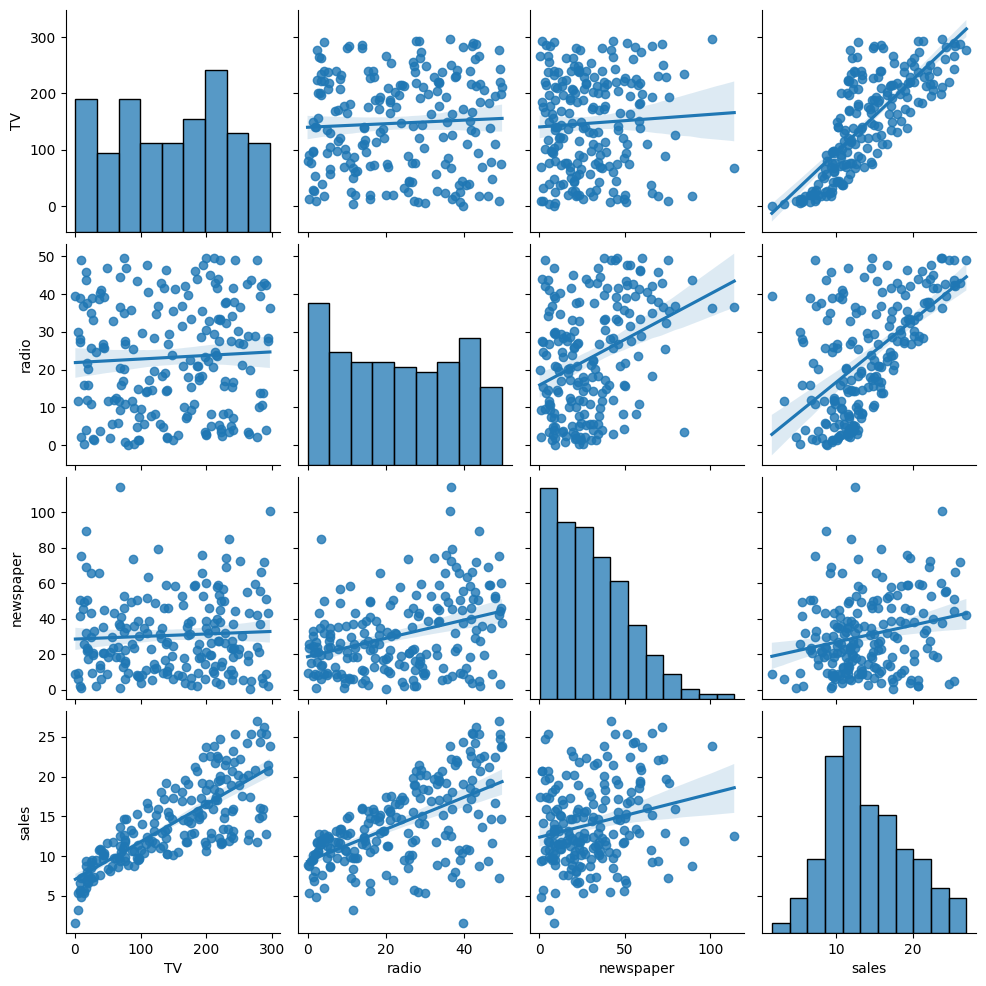

In [19]:
sns.pairplot(df,kind="reg")

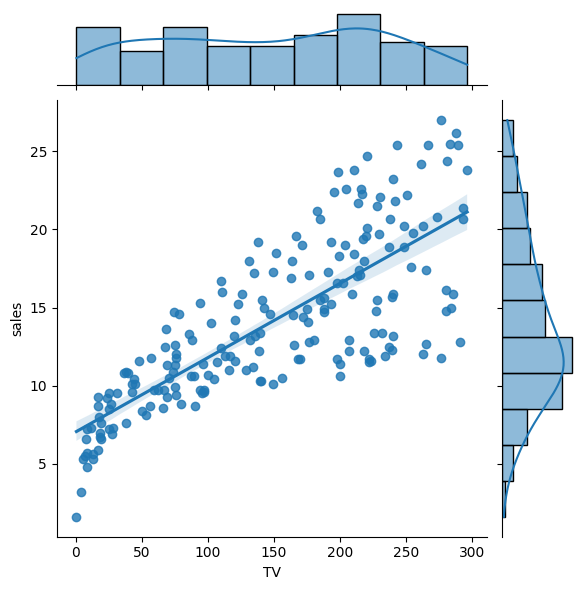

In [20]:
sns.jointplot(x="TV",y="sales",data=df,kind="reg")

*statsmodel*

In [21]:
X=df[["TV"]]
X[:5]

,TV
0,230.1
1,44.5
2,17.2
3,151.5
4,180.8


In [24]:
X=sm.add_constant(X)

In [25]:
X

,const,TV
0,1.0,230.1
1,1.0,44.5
2,1.0,17.2
3,1.0,151.5
4,1.0,180.8
...,...,...
195,1.0,38.2
196,1.0,94.2
197,1.0,177.0
198,1.0,283.6


In [22]:
y=df["sales"]
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [26]:
lm=sm.OLS(y,X)

In [28]:
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  sales   R-squared:                       0.612
Model:                            OLS   Adj. R-squared:                  0.610
Method:                 Least Squares   F-statistic:                     312.1
Date:                Wed, 10 Sep 2025   Prob (F-statistic):           1.47e-42
Time:                        21:42:58   Log-Likelihood:                -519.05
No. Observations:                 200   AIC:                             1042.
Df Residuals:                     198   BIC:                             1049.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.0326      0.458     15.360      0.000       6.130       7.935
TV             0.0475      0.003     17.668      0.000       0.042       0.053
==============================================================================
Omnibus:                        0.531   Durbin-Watson:                   1.935
Prob(Omnibus):                  0.767   Jarque-Bera (JB):                0.669
Skew:                          -0.089   Prob(JB):                        0.716
Kurtosis:                       2.779   Cond. No.                         338.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [33]:
model.params

const    7.032594
TV       0.047537
dtype: float64

In [34]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,7.0326,0.458,15.360,0.000,6.130,7.935
TV,0.0475,0.003,17.668,0.000,0.042,0.053


In [36]:
model.conf_int()

,0,1
const,6.129719,7.935468
TV,0.042231,0.052843


In [37]:
model.f_pvalue

np.float64(1.4673897001947095e-42)

In [39]:
model.fvalue

np.float64(312.1449943727128)

In [41]:
model.tvalues

const    15.360275
TV       17.667626
dtype: float64

In [43]:
model.mse_model

np.float64(3314.6181668686486)

In [44]:
model.rsquared

np.float64(0.611875050850071)

In [45]:
model.fittedvalues[:5]

0    17.970775
1     9.147974
2     7.850224
3    14.234395
4    15.627218
dtype: float64

In [46]:
y[:5]

0    22.1
1    10.4
2     9.3
3    18.5
4    12.9
Name: sales, dtype: float64

In [48]:
print("sales=" +str("%.2f") % model.params[0]+"+ TV "+ "* "+str("%.2f")% model.params[1])

sales=7.03+ TV * 0.05


/var/folders/50/8zx_6x713jv2x3s7tf2tpsqr0000gn/T/ipykernel_21839/3695557611.py:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print("sales=" +str("%.2f") % model.params[0]+"+ TV "+ "* "+str("%.2f")% model.params[1])


In [50]:
from sklearn.linear_model import LinearRegression

In [52]:
X=df[["TV"]]
y=df["sales"]
reg=LinearRegression()
model=reg.fit(X,y)
model.intercept_
model.coef_

array([0.04753664])

In [55]:
model.score(X,y)

0.611875050850071

In [56]:
model.predict(X)[:10]

array([17.97077451,  9.14797405,  7.85022376, 14.23439457, 15.62721814,
        7.44616232,  9.76595037, 12.74649773,  7.44140866, 16.53041431])